## Visualization

**Our plan for today:**

+ pandas - to organize the data
+ Matplotlib
+ Seaborn
+ Wordcloud



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

#### A simple plot

The dots with X- and Y-coordinates are connected with lines. One chooses this type of plot if there is a one-to-one correspondence between the X- and Y-coordinates and wants to demonstrate how y changes with the changes in x. For example, x could be time and y could be word frequency.


X: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Y: [2, 36, 24, 40, 72, 86, 71, 120, 112, 138]


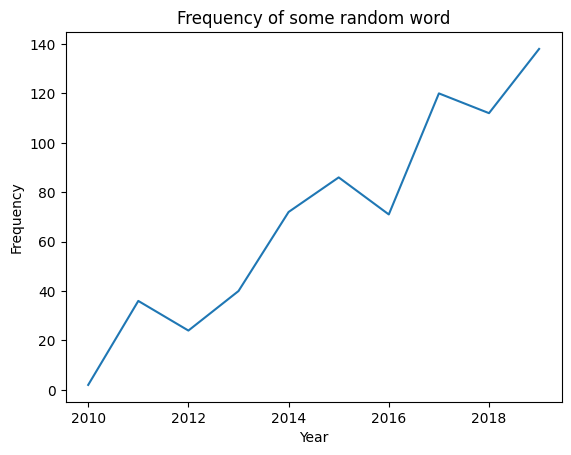

In [2]:
X = list(range(2010, 2020))
Y = [random.randint(i*10, (i+1)*20) for i in range(len(X))]
print('X:', X)
print('Y:', Y)

plt.plot(X, Y) # drawing the plot -- connecting one by one the X and the Y coordinates
plt.title('Frequency of some random word') # the title
plt.ylabel('Frequency') # label for the Y axis
plt.xlabel('Year') # label for the X axis
plt.show()

#### Scatter plot

The dots have X- and Y-coordinates, but are not connected by lines. Great for depiction of the experimental data with two parameters.


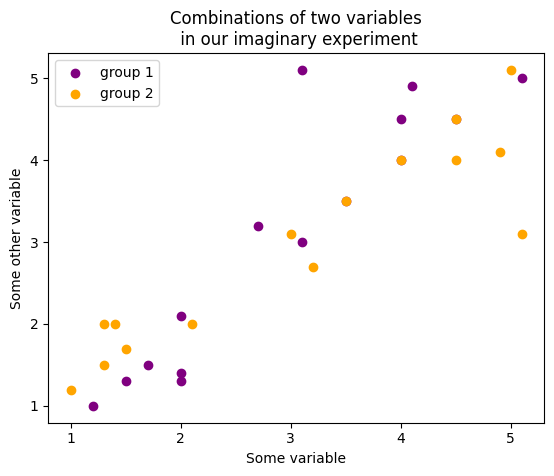

In [3]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]

plt.scatter(X, Y, color='purple', label='group 1') # changing the color, adding labels
plt.scatter(Y, X, color='orange', label='group 2') # adding a second group of data
plt.title('Combinations of two variables\n in our imaginary experiment') # the title
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.legend(loc='best') # the legend is located automatically in the best possible place
plt.show()

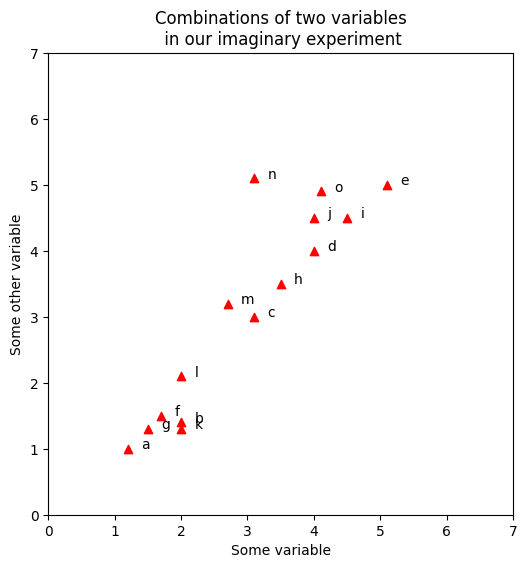

In [4]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]
labels = 'abcdefghijklmno'
plt.figure(figsize=(6, 6)) # the size of the plot
plt.scatter(X, Y, color='red', label='group 1', marker='^') # a triangular marker
for x, y, key in zip(X, Y, range(len(X))):
    plt.text(x+0.2, y, labels[key]) # labels
plt.title('Combinations of two variables\n in our imaginary experiment')
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.xlim((0, 7)) # X-limit
plt.ylim((0, 7)) # Y-limit
plt.show()

#### Bar plot

A bar plot is chosen if we have categories along the X-axis and values along the Y-axis; for example, if we have the days of the week and the mean number of swear words per day.


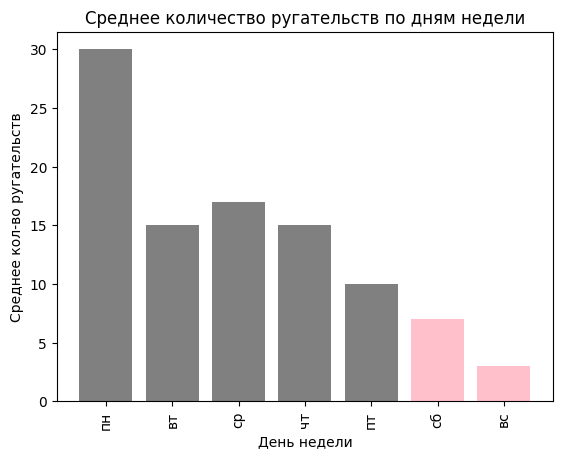

In [5]:
x = [1, 2, 3, 4, 5]
x2 = [6, 7] # making the weekend a separate list
y = [30, 15, 17, 15, 10]
y2 = [7, 3]
days = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
plt.bar(x, y, color='grey')
plt.bar(x2, y2, color='pink')
plt.xticks(x + x2, days, rotation='vertical')
plt.title('Среднее количество ругательств по дням недели')
plt.ylabel('Среднее кол-во ругательств')
plt.xlabel('День недели')
plt.show()

#### Heatmap

A heatmap is needed when we have 3 variables.


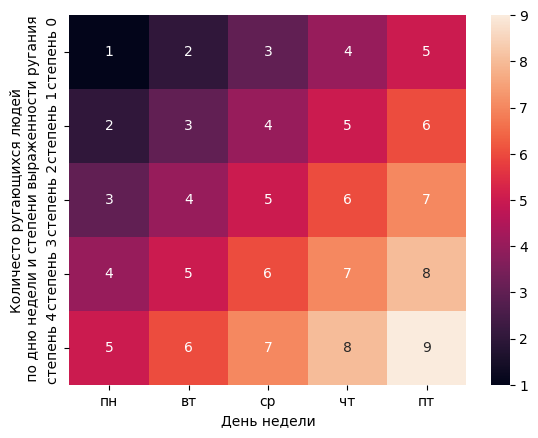

In [10]:
X = [
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [3, 4, 5, 6, 7],
    [4, 5, 6, 7, 8],
    [5, 6, 7, 8, 9],
]
sns.heatmap(
    X, # the matrix of values
    annot=True, # values taken from the matrix
    xticklabels=days[:5],
    yticklabels=[f'степень {i}' for i in range(0, 5)],
    #cmap="rocket_r"#if you want to reverse the colour scale
)
plt.xlabel('День недели')
plt.ylabel('Степень выраженности ругания')
plt.ylabel('Количесто ругающихся людей\n по дню недели и степени выраженности ругания')
plt.show()

#### Pandas

In [8]:
import pandas as pd

In [12]:
tolstoy = pd.read_csv('tolstoy.csv', sep='\t').fillna('') # reading from file and substituting empty values with empty rows

In [13]:
tolstoy.head(10)

,lex,word,POS,time,gender,case,number,verbal,adj_form,comp,...,имя,отч,фам,вводн,гео,сокр,обсц,разг,редк,устар
0,том,том,S,,муж,вин,ед,,,,...,,,,,,,,,,
1,первый,первый,ANUM,,муж,вин,ед,,,,...,,,,,,,,,,
2,часть,часть,S,,жен,вин,ед,,,,...,,,,,,,,,,
3,первый,первая,ANUM,,жен,им,ед,,,,...,,,,,,,,,,
4,ну,ну,PART,,,,,,,,...,,,,,,,,,,
5,здравствовать,здравствуйте,V,,,,мн,пов,,,...,,,,,,,,,,
6,здравствовать,здравствуйте,V,,,,мн,пов,,,...,,,,,,,,,,
7,садиться,садитесь,V,непрош,,,мн,изъяв,,,...,,,,,,,,,,
8,и,и,CONJ,,,,,,,,...,,,,,,,,,,
9,рассказывать,рассказывайте,V,,,,мн,пов,,,...,,,,,,,,,,


In [14]:
tolstoy['gender'].value_counts()

        31512
муж     17635
жен      9410
сред     5028
мж         47
Name: gender, dtype: int64

In [15]:
tolstoy[tolstoy['gender'] == 'мж']['lex'].value_counts().head(10)

лаврушка      12
браунау       11
моро           5
душенька       2
бондаренко     2
убийца         1
женя           1
никитенко      1
ысью           1
голлабруня     1
Name: lex, dtype: int64

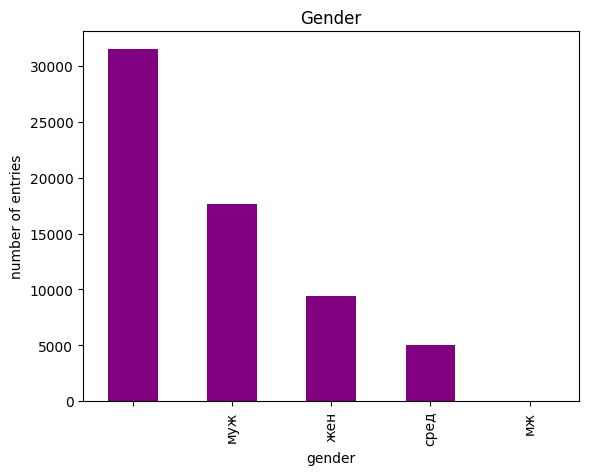

In [16]:
tolstoy['gender'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

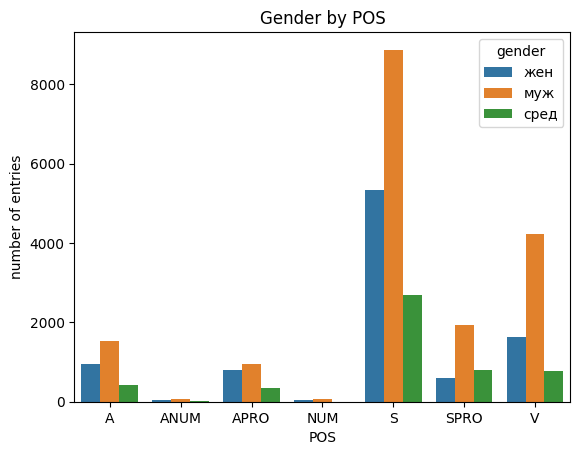

In [17]:
df2 = tolstoy[
    (tolstoy['gender'] != '') & (tolstoy['gender'] != 'мж')
][
    ['POS', 'gender', 'number']
].groupby(['POS', 'gender'], as_index=False).count()

df2.columns = ['POS', 'gender', 'total']
sns.barplot(x="POS", y="total", hue='gender', data=df2)
plt.title('Gender by POS')
plt.xlabel('POS')
plt.ylabel('number of entries');

#### Pie chart

To visualize proportions of the whole, but be careful: pie charts may mislead where comparisons are concerned and if the proportions are small.


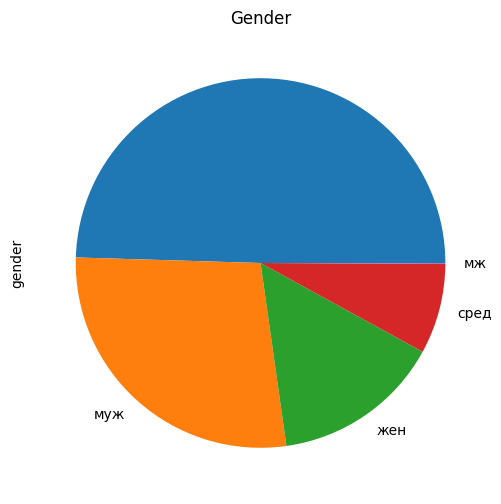

In [18]:
plt.figure(figsize=(6, 6))
tolstoy['gender'].value_counts().plot(kind='pie');
plt.title('Gender');

In [19]:
df2 = tolstoy[['lex', 'POS', 'gender']].groupby(['lex', 'POS'], as_index=False).count()
df2.columns = ['lex', 'POS', 'total']
df2 = df2[df2['total'] > 10]

#### Box plot

Box plots are great to show differences between different groups, e.g., when we want to display counts per part-of-speech.


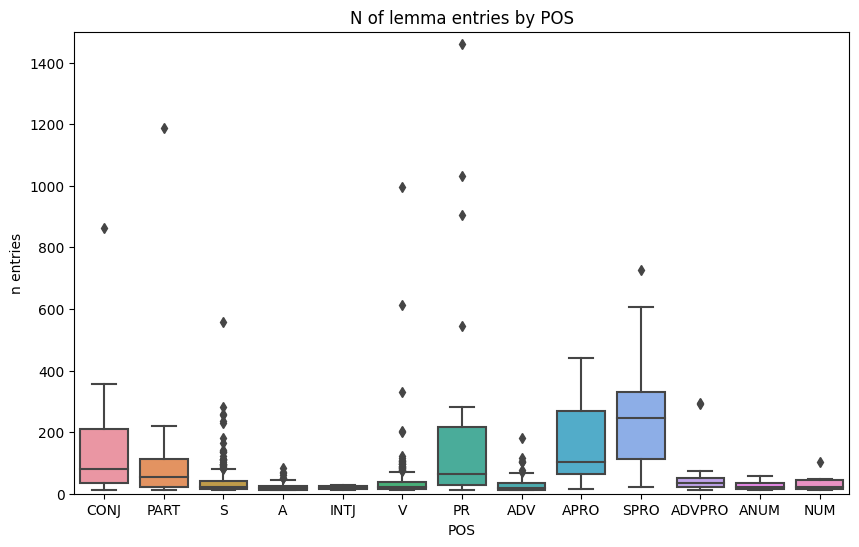

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="POS", y="total", data=df2)
plt.ylim((0, 1500))
plt.title('N of lemma entries by POS')
plt.ylabel('n entries')
plt.xlabel('POS');

#### Histogram

A histogram displays a single variable.


<Figure size 1000x600 with 0 Axes>

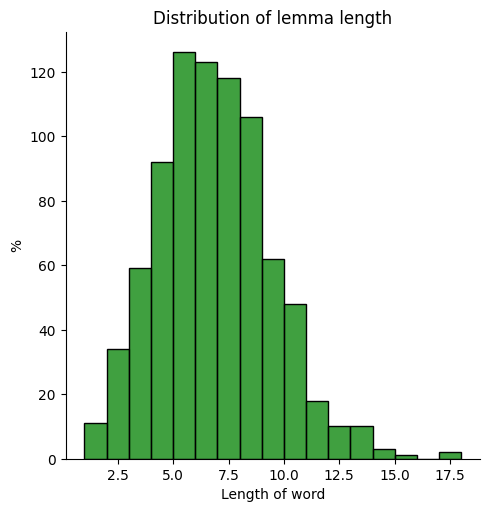

In [24]:
df2['length'] = df2['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.displot(df2['length'], bins=17, color='green')#histplot can also be used
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

#### Word cloud

Python has a library `wordcloud` that allows you to create word clouds. [It's documentation with examples](https://amueller.github.io/word_cloud/auto_examples/index.html). NB! Don't forget to install the library first: `pip install wordcloud`.

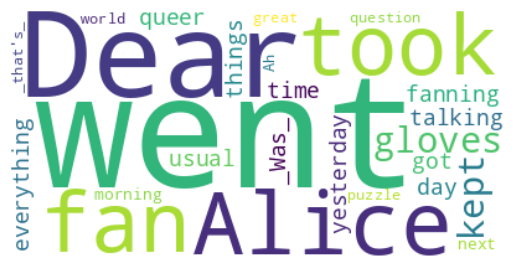

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = """Alice took up the fan and gloves and she kept fanning herself all the
time she went on talking. "Dear, dear! How queer everything is to-day!
And yesterday things went on just as usual. _Was_ I the same when I got
up this morning? But if I'm not the same, the next question is, 'Who in
the world am I?' Ah, _that's_ the great puzzle!'"""

cloud = WordCloud(background_color="white", max_words=2000)

# generating
cloud.generate(text)

# displaying
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

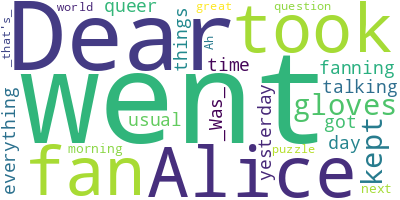

In [27]:
# the real size of the plot
Image.open("post_cloud.png")